# Módulo 6 · Preprocesamiento y Escalamiento de Datos
**Actividad L3 – Análisis de caso**

## 1) Instalación/Imports
Instalación de librerías requeridas: `pandas`, `numpy`, `scikit-learn`, `matplotlib`.

In [19]:
# Imports
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Config opcional para ver más columnas
pd.set_option('display.max_columns', 50)

## 2) Dataset base (ejemplo del enunciado)
Usamos un dataset reproducible pequeño con un valor faltante en `Ingresos_USD` y una variable categórica `Ciudad`.

In [20]:
# Dataset base
df = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Edad": [25, 45, 30, 40],
    "Ciudad": ["Madrid", "Sevilla", "Madrid", "Barcelona"],
    "Ingresos_USD": [30000, 50000, np.nan, 40000]
})
df

,ID,Edad,Ciudad,Ingresos_USD
0,1,25,Madrid,30000.0
1,2,45,Sevilla,50000.0
2,3,30,Madrid,NaN
3,4,40,Barcelona,40000.0


## 3) Imputación de valores faltantes
Imputamos `Ingresos_USD` con la **media** (estrategia clásica para variables numéricas).

In [21]:
# Imputación media
imputer = SimpleImputer(strategy="mean")
df["Ingresos_USD_imputado"] = imputer.fit_transform(df[["Ingresos_USD"]])
df[["Ingresos_USD", "Ingresos_USD_imputado"]]

,Ingresos_USD,Ingresos_USD_imputado
0,30000.0,30000.0
1,50000.0,50000.0
2,NaN,40000.0
3,40000.0,40000.0


## 4) Codificación categórica
Mostramos tres alternativas frecuentes:
- **Label Encoding** (asigna números a categorías).
- **One-Hot Encoding (sklearn)** (una columna por categoría).
- **Variables Dummy (pandas)** con `drop_first=True` para evitar multicolinealidad en modelos lineales.

In [22]:
# Label Encoding
le = LabelEncoder()
df["Ciudad_label"] = le.fit_transform(df["Ciudad"])

# One-Hot Encoding (compatibilidad: usar 'sparse=False')
ohe = OneHotEncoder(sparse_output=False, drop=None)
ciudad_ohe = ohe.fit_transform(df[["Ciudad"]])
ohe_cols = [f"Ciudad_{c}" for c in ohe.categories_[0]]
df_ohe = pd.DataFrame(ciudad_ohe, columns=ohe_cols, index=df.index)

# Dummies (drop_first=True)
df_dummies = pd.get_dummies(df[["Ciudad"]], prefix="CiudadDummy", drop_first=True)

# Unimos todo para comparar
df_enc = pd.concat([df, df_ohe, df_dummies], axis=1)
df_enc


,ID,Edad,Ciudad,Ingresos_USD,Ingresos_USD_imputado,Ciudad_label,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla,CiudadDummy_Madrid,CiudadDummy_Sevilla
0,1,25,Madrid,30000.0,30000.0,1,0.0,1.0,0.0,True,False
1,2,45,Sevilla,50000.0,50000.0,2,0.0,0.0,1.0,False,True
2,3,30,Madrid,NaN,40000.0,1,0.0,1.0,0.0,True,False
3,4,40,Barcelona,40000.0,40000.0,0,1.0,0.0,0.0,False,False


## 5) Escalamiento (normalización vs. estandarización)
Aplicamos **Min-Max** (rango [0,1]) y **Z-Score** (media 0, desvío 1) a `Edad` e `Ingresos_USD_imputado`. Útil para algoritmos basados en distancia o que son sensibles a la escala.

In [23]:
# Escalamiento
minmax = MinMaxScaler()
zscaler = StandardScaler()

scaled_minmax = minmax.fit_transform(df_enc[["Edad", "Ingresos_USD_imputado"]])
scaled_z = zscaler.fit_transform(df_enc[["Edad", "Ingresos_USD_imputado"]])

df_enc[["Edad_minmax", "Ingresos_minmax"]] = scaled_minmax
df_enc[["Edad_zscore", "Ingresos_zscore"]] = scaled_z

df_enc

,ID,Edad,Ciudad,Ingresos_USD,Ingresos_USD_imputado,Ciudad_label,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla,CiudadDummy_Madrid,CiudadDummy_Sevilla,Edad_minmax,Ingresos_minmax,Edad_zscore,Ingresos_zscore
0,1,25,Madrid,30000.0,30000.0,1,0.0,1.0,0.0,True,False,0.00,0.0,-1.264911,-1.414214
1,2,45,Sevilla,50000.0,50000.0,2,0.0,0.0,1.0,False,True,1.00,1.0,1.264911,1.414214
2,3,30,Madrid,NaN,40000.0,1,0.0,1.0,0.0,True,False,0.25,0.5,-0.632456,0.000000
3,4,40,Barcelona,40000.0,40000.0,0,1.0,0.0,0.0,False,False,0.75,0.5,0.632456,0.000000


## 6) Visualización rápida (Z-Score)
Graficamos un *scatter* en espacio estandarizado para evidenciar el escalamiento.

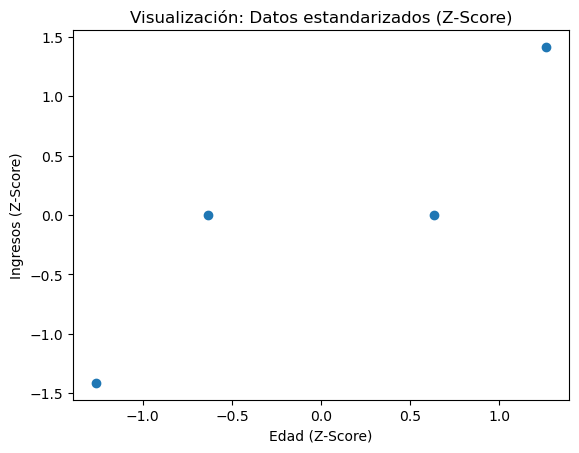

In [25]:
# Gráfico scatter Z-Score
plt.figure()
plt.scatter(df_enc["Edad_zscore"], df_enc["Ingresos_zscore"])
plt.xlabel("Edad (Z-Score)")
plt.ylabel("Ingresos (Z-Score)")
plt.title("Visualización: Datos estandarizados (Z-Score)")
plt.show()

## 7) Guardar resultados
Exportamos el dataset procesado a **CSV** y **XLSX**, y guardamos el gráfico como **PNG**.

In [28]:
# Guardados
csv_path = "clientes_preprocesado.csv"
xlsx_path = "clientes_preprocesado.xlsx"
png_path = "plot_escalado.png"

df_enc.to_csv(csv_path, index=False, encoding="utf-8")
df_enc.to_excel(xlsx_path, index=False)

plt.figure()
plt.scatter(df_enc["Edad_zscore"], df_enc["Ingresos_zscore"])
plt.xlabel("Edad (Z-Score)")
plt.ylabel("Ingresos (Z-Score)")
plt.title("Visualización: Datos estandarizados (Z-Score)")
plt.savefig(png_path, bbox_inches="tight", dpi=180)
plt.close()

print("OK: archivos generados ->", csv_path, xlsx_path, png_path)

OK: archivos generados -> clientes_preprocesado.csv clientes_preprocesado.xlsx plot_escalado.png
